### Introduction
Name: Andrian Tanjung
Batch: HCK 004

##### Background Story
Customers are considered the most important aspect of any business, and it's a well-known fact that they hold the power to determine which products and services succeed in the market. Without customers, companies cannot thrive in their respective industries. Therefore, it's essential to build strong relationships with your existing customers and provide them with valuable experiences that encourage them to return to purchase your products or services repeatedly.

##### Dataset Overview
The dataset provides information about the purchasing behavior of customers on the company's website.

##### Problem Statement
The objective is to implement an artificial neural network model capable of accurately classifying the likelihood of customer churn based on the provided dataset.

### Import Libraries

In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime

## model
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

## feature selection
from phik import phik_matrix
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from feature_engine.outliers import Winsorizer

#evaluasi
from sklearn.metrics import confusion_matrix ,accuracy_score, roc_curve,roc_auc_score,precision_score, recall_score, classification_report, f1_score

## warning
import warnings 
warnings.filterwarnings(action='ignore')

## save
import joblib

In [82]:
df = pd.read_csv('churn.csv')
df.head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

The dataset contains 37010 data entries and 22 columns, including 7 numeric and 15 object data types. However, the 'Joining_date' column should have been a datetime data type, and 'churn_risk_score' is a categorical column despite being represented as an integer.

In [84]:
df.isnull().sum()

user_id                            0
age                                0
gender                            59
region_category                 5431
membership_category                0
joining_date                       0
joined_through_referral         5442
preferred_offer_types            288
medium_of_operation             5395
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [85]:
df[df.isnull().any(axis=1)]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,...,1397.318999,29664.01,28.0,782.49,No,Yes,Yes,Unsolved,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.790000,30820.83,23.0,631.83,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,...,499.510000,17110.71,24.0,587.01,Yes,No,No,Not Applicable,Poor Customer Service,1
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0


There are 5 columns which consist of missing values, and some of them are higher than 10%. As columns like 'gender' and 'preferred_offer_types' can be categorized as CMAR and as the rest are MAR because of the number of missing values happened on those columns are similar.

In [86]:
df.duplicated().sum()

18

There are 18 entries duplicated data that we can drop because of the small amoount of it.

In [87]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000
mean,37.120697,-41.943502,279.201356,29272.430216,14.659540,623.590885,0.540881
std,15.866834,228.875324,330.017336,19445.963492,9.478756,270.218956,0.498333
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000,0.000000
25%,23.000000,8.000000,60.122500,14177.835000,7.000000,574.220000,0.000000
50%,37.000000,12.000000,161.770000,27554.485000,14.000000,680.400000,1.000000
75%,51.000000,16.000000,356.525000,40858.672500,22.000000,756.990000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000


Several columns in the dataset exhibit outliers, as evidenced by a large discrepancy between the mean and median values. Additionally, it appears that there may be an error in the 'days_since_last_login' column, as the minimum value appears to be significantly lower than expected.

In [88]:
df[(df['days_since_last_login']<0)][['days_since_last_login','churn_risk_score']].value_counts()

days_since_last_login  churn_risk_score
-999                   1                   1109
                       0                    892
dtype: int64

There are 2001 entries data with the minus value on the 'days_since_last_login' and both binary 'churn_risk_score' in values. I will conclude that this as an error input.

In [89]:
df.describe(include='object')

,user_id,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
count,37010,36951,31579,37010,37010,31568,36722,31615,37010,37010,37010,37010,37010,37010,37010
unique,36992,2,3,6,1096,2,3,3,3,30101,2,2,2,5,9
top,b749631fc10ff0da,F,Town,Basic Membership,2015-06-02,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,07:56:41,Yes,Yes,No,Not Applicable,Poor Product Quality
freq,2,18497,14135,7727,55,15846,12357,13917,12417,6,20353,20449,18611,18611,6353


Many categorical values here are non-binary category and let us see what they are.

In [90]:
for i in ['region_category','membership_category','preferred_offer_types','medium_of_operation','internet_option','complaint_status','feedback']:
    print(i)
    print(df[i].value_counts())
    print('-' * 10)
## seeing values from above column

region_category
Town       14135
City       12744
Village     4700
Name: region_category, dtype: int64
----------
membership_category
Basic Membership       7727
No Membership          7693
Gold Membership        6799
Silver Membership      5991
Premium Membership     4458
Platinum Membership    4342
Name: membership_category, dtype: int64
----------
preferred_offer_types
Gift Vouchers/Coupons       12357
Credit/Debit Card Offers    12281
Without Offers              12084
Name: preferred_offer_types, dtype: int64
----------
medium_of_operation
Desktop       13917
Smartphone    13885
Both           3813
Name: medium_of_operation, dtype: int64
----------
internet_option
Wi-Fi          12417
Mobile_Data    12346
Fiber_Optic    12247
Name: internet_option, dtype: int64
----------
complaint_status
Not Applicable              18611
Unsolved                     4647
Solved                       4622
Solved in Follow-up          4579
No Information Available     4551
Name: complaint_status, dt

Several values can be compacted into the same category to reduce ordinality

Things need to be done on data cleaning:
- handling MCAR and MAR missing value
- remove duplicate
- remove 'days_since_last_login' minus values
- change some columns data type
- handling ordinality

### Data Cleaning

In [91]:
df.dropna(subset=['gender','preferred_offer_types'], inplace=True)
## removing missing value on specific columns

In [92]:
df[['gender','preferred_offer_types']].isnull().sum()
## check the missing value has been handled

gender                   0
preferred_offer_types    0
dtype: int64

In [93]:
df.drop_duplicates(inplace=True)
## drop duplicates

In [94]:
df.duplicated().sum()
## check the duplicated value has been handled

0

As we can see that missing value in column 'gender' and 'preferred_offer_types and duplicated entries have been handled.

In [95]:
df.region_category.replace({np.nan:'Other'}, inplace=True)
df.joined_through_referral.replace({np.nan:'No'}, inplace=True)
df.medium_of_operation.replace({np.nan:'Other'}, inplace=True)
df['complaint_status'].replace({
                                'No Information Available' : 'Not Applicable',
                                'Solved in Follow-up' : 'Solved'
                                }, inplace=True)
df['feedback'].replace({
                        'Poor Website' : 'Poor',
                        'Poor Customer Service' : 'Poor',
                        'Too many ads' : 'Poor',
                        'Poor Product Quality' : 'Poor',
                        'Products always in Stock' : 'Good',
                        'Reasonable Price' : 'Good',
                        'Quality Customer Care' : 'Good',
                        'User Friendly Website' : 'Good'
                        }, inplace=True)
## replacing missing value and handling ordinality

Missing value from 'region_category' and 'medium_of_operation' can be classified as other type of values, whereas 'joined_through_referral' missing value can be considered that those people did not joined through referral.
Some values on 'complaint_status' and 'feedback' have been compacted to avoid ordinality

In [96]:
df.drop(df[(df['days_since_last_login']<0)].index, inplace=True)
## handling minus values from 'days_since_last_login' column

In [97]:
df[(df['days_since_last_login']<0)].value_counts()
## check the minus values have been handled

Series([], dtype: int64)

The minus value from 'days_since_last_login' column has been handled

In [98]:
df.drop(columns=['user_id','last_visit_time','joining_date'], inplace=True)
## delete user_id, last_visit_time and joining_date columns

Deleting user_id, last_visit_time and joining_date because those columns are irrelevant with the data we want to modify.

In [99]:
df.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,29,F,Other,No Membership,Yes,Without Offers,Other,Wi-Fi,4,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,Not Applicable,Poor,1
1,50,M,Other,Basic Membership,Yes,Without Offers,Desktop,Fiber_Optic,11,338.15,7665.66,17.0,575.97,Yes,No,Yes,Not Applicable,Poor,1
2,26,F,City,Silver Membership,No,Credit/Debit Card Offers,Other,Fiber_Optic,8,235.14,37671.69,5.0,767.93,Yes,No,Yes,Not Applicable,Poor,0
3,63,F,Village,No Membership,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,10,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Poor,1
4,64,M,Town,Silver Membership,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,9,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor,0


So these are the dataset that we will take a closer look into and make the model from it.

### General Exploratory Data Analysis

<Axes: >

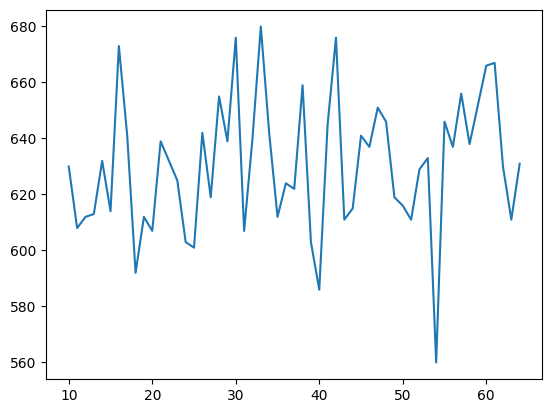

In [100]:
df.age.value_counts().sort_index().plot(kind='line')
## visualize customers by age

The minimum and maximum individuals' age that use the website is 10 and 64. The most users are in the age of 33 and the least users are in the age 53. As we can see that the company is really good with their selling cause they can attract individuals that ranging from kids to elderly people. 

<Axes: xlabel='churn_risk_score', ylabel='count'>

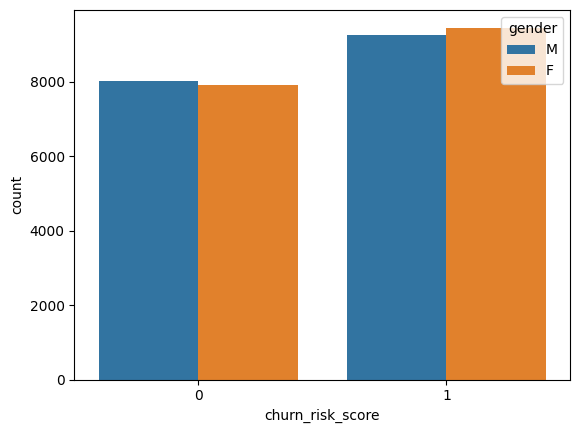

In [101]:
viz = df.groupby('churn_risk_score', as_index=False)['gender'].value_counts()
sns.barplot(data=viz, x='churn_risk_score', y='count', hue='gender')
## visualize churn risk based on gender

Churn risk based on the gender we can conclude that female is more being disloyal towards the usage of company's product. As from the graph we can confirm that the total data from class 1 is more than class 0. 

<Axes: xlabel='churn_risk_score', ylabel='count'>

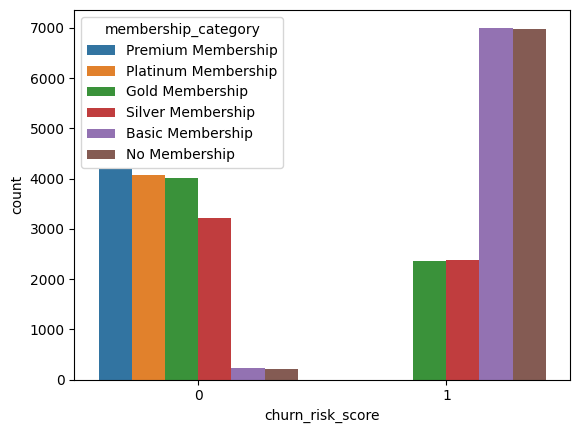

In [102]:
viz = df.groupby('churn_risk_score', as_index=False)['membership_category'].value_counts()
sns.barplot(data=viz, x='churn_risk_score', y='count', hue='membership_category')
## visualize churn risk based on membership

According to the graph, it seems that having a membership is pretty important when it comes to predicting churn risk for people. It looks like folks who have basic or no membership are more likely to churn compared to those who have platinum or premium membership. Interestingly, the graph doesn't show any platinum or premium members in the high churn risk category.

<Axes: xlabel='churn_risk_score', ylabel='count'>

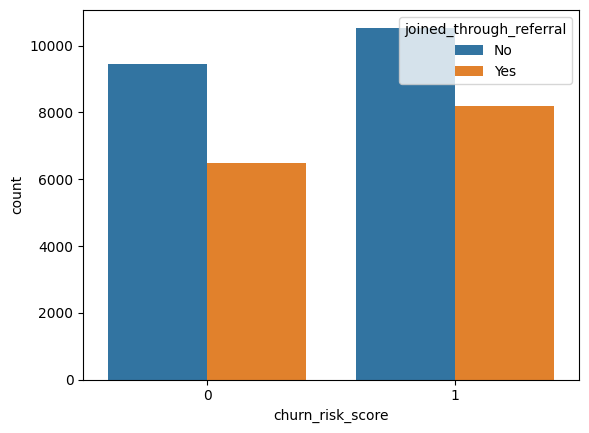

In [103]:
viz = df.groupby('joined_through_referral', as_index=False)['churn_risk_score'].value_counts()
sns.barplot(data=viz, x='churn_risk_score', y='count', hue='joined_through_referral')
## visualize churn risk based on join referral

Based on the data, it seems that people who joined through the referral program are more likely to fall into the churn risk category. It's possible that these individuals were attracted to the website due to a promotional discount, but once the discount was no longer available, they lost interest and stopped using the website.

<Axes: xlabel='churn_risk_score', ylabel='count'>

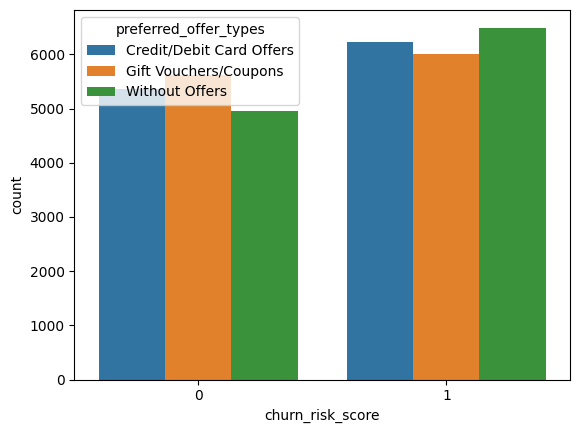

In [104]:
viz = df.groupby('preferred_offer_types', as_index=False)['churn_risk_score'].value_counts()
sns.barplot(data=viz, x='churn_risk_score', y='count', hue='preferred_offer_types')
## visualize churn risk based on offer types

Looking at the graph, it appears that individuals who leave are more likely to have not liked any of the offers given to them, while those who stay tend to appreciate gift voucher offers.

<Axes: xlabel='medium_of_operation', ylabel='count'>

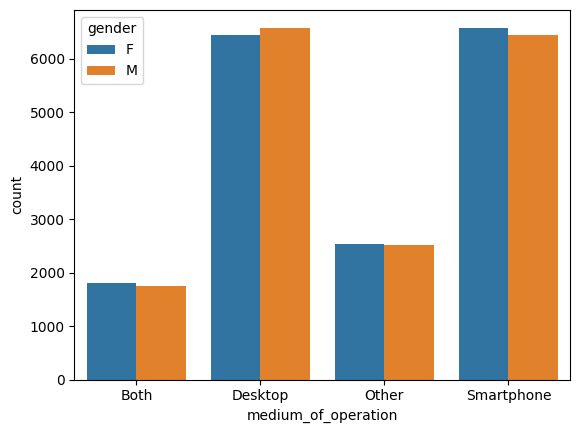

In [105]:
viz = df.groupby('medium_of_operation', as_index=False)['gender'].value_counts()
sns.barplot(data=viz, x='medium_of_operation', y='count', hue='gender')


From the graph above we can see that men are prefer using dekstop to access the website whether women prefers using smartphone. We also can conclude that men are more versatile with the medium of operation to access the website because men operate more in other mediums than women.

<Axes: xlabel='avg_time_spent', ylabel='internet_option'>

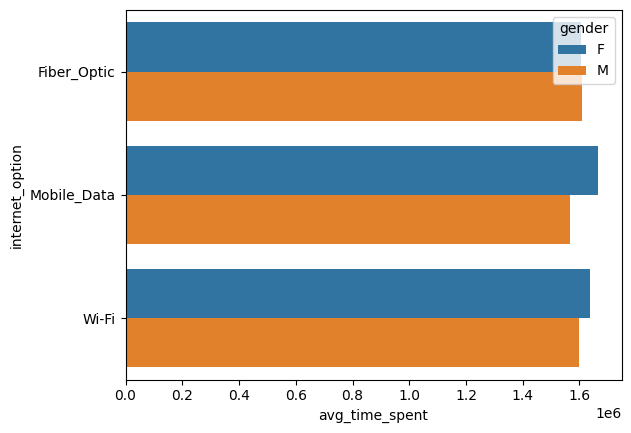

In [106]:
viz = df.groupby(['internet_option','gender'], as_index=False)['avg_time_spent'].sum()
sns.barplot(data=viz, x='avg_time_spent', y='internet_option', hue='gender')

Based on the data provided, it appears that men tend to visit the website from their home more frequently than women do. This could be due to the fact that men are more likely to use fiber optic internet, which is typically used in households. On the other hand, women seem to use mobile data more often, which may suggest that they access the website while on-the-go and away from their home where they may not have access to WiFi nor fiber optic line.

<Axes: xlabel='avg_time_spent', ylabel='membership_category'>

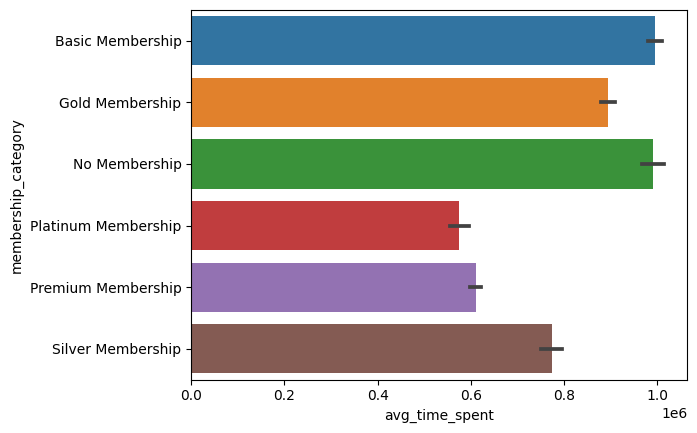

In [107]:
viz = df.groupby(['membership_category','gender'], as_index=False)['avg_time_spent'].sum()
sns.barplot(data=viz, x='avg_time_spent', y='membership_category')

As shown in the data, it appears that basic and non-members spend more time on the website compared to premium and platinum members. One possible explanation for this could be that basic and non-members are new to the website and are still exploring the available products and services. In contrast, premium and platinum members may already know what they want to purchase and therefore spend less time browsing the website.

<Axes: xlabel='avg_time_spent', ylabel='gender'>

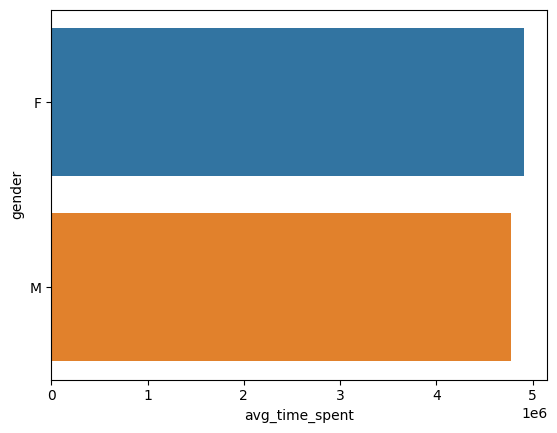

In [108]:
viz = df.groupby(['gender'], as_index=False)['avg_time_spent'].sum()
sns.barplot(data=viz, x='avg_time_spent', y='gender')

We can see that women spend more time towards the company website than men.

<Axes: xlabel='avg_transaction_value', ylabel='membership_category'>

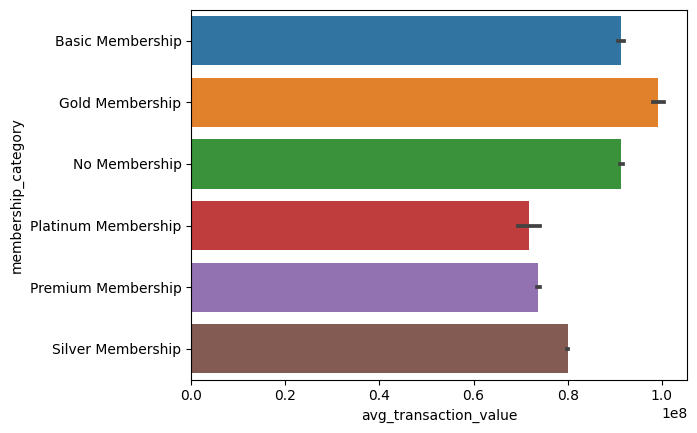

In [109]:
viz = df.groupby(['membership_category','gender'], as_index=False)['avg_transaction_value'].sum()
sns.barplot(data=viz, x='avg_transaction_value', y='membership_category')

According to the data, customers with gold membership have the highest average transaction value, followed by those with basic and non-membership. This may be related to the average time spent that basic and non-membership customers spend the most time on the website, as they are likely to explore more products and services, leading to higher transaction values. 

<Axes: xlabel='used_special_discount'>

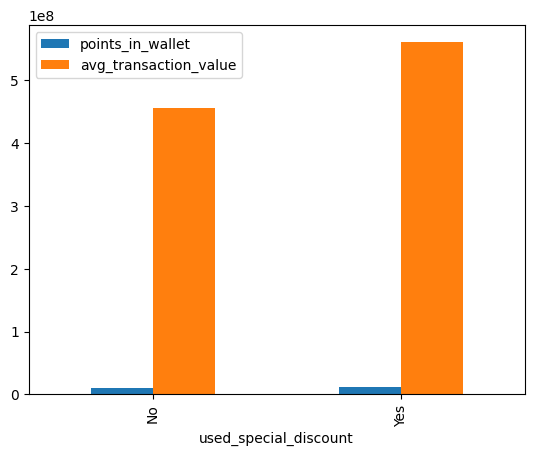

In [110]:
df.groupby(['used_special_discount'])[['points_in_wallet','avg_transaction_value']].sum().plot(kind='bar')


We can see that with the special discount promotion it leads to bigger transaction and top up to the user's wallet. 

<Axes: xlabel='past_complaint', ylabel='count'>

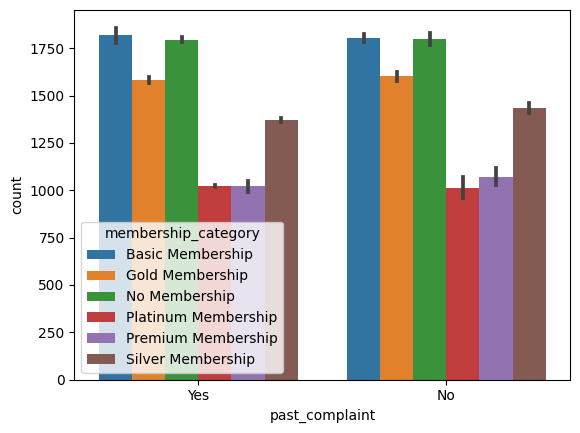

In [111]:
viz = df.groupby(['membership_category','gender'], as_index=False)['past_complaint'].value_counts()
sns.barplot(data=viz, x='past_complaint', y='count', hue='membership_category')

From the graph above we can assume that higher membership leads into less complaint given to the company which show how important to keep and attract more people to become the higher membership.

<Axes: xlabel='complaint_status', ylabel='count'>

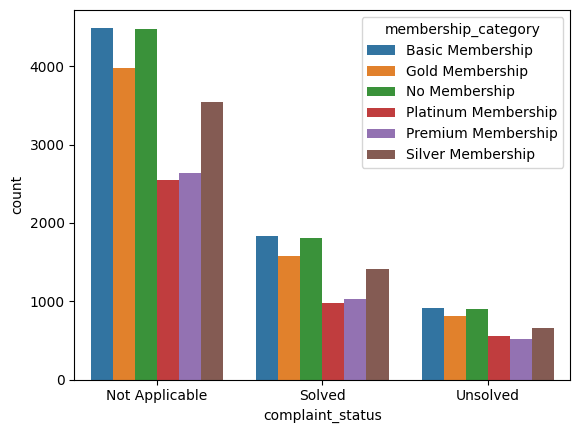

In [112]:
viz = df.groupby(['membership_category'], as_index=False)['complaint_status'].value_counts()
sns.barplot(data=viz, x='complaint_status', y='count', hue='membership_category')

Because most number of complaints are coming from basic and non-member, we can see that the most solved and unresolved cases are from them too. Even though platinum is higher level than premium but we can see that unresolved cases are more within the platinum membership.

### Feature Engineering Data for Modeling

In [113]:
X_train, X_test, y_train, y_test = train_test_split(df, df['churn_risk_score'], train_size=0.69, stratify=df['churn_risk_score'])
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, train_size=0.69, stratify=y_train)
for i in [X_train, X_test, y_train, y_test, X_val, y_val]:
    print(i.shape)
## split x y train test and validation

(16503, 19)
(10746, 19)
(16503,)
(10746,)
(7415, 19)
(7415,)


Splitting into X train-test, validation and y train test with training 69% of training size and stratify technique so the distribution of the target will be balance

In [114]:
cat_col = df.select_dtypes(include=['object']).columns.to_list()
num_col = df.describe().columns.to_list()
num_col1 = df.describe().drop(columns='churn_risk_score').columns.to_list()
## making numeric and category columns

print('categorical column:', cat_col)
print('numerical column:', num_col)

categorical column: ['gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']
numerical column: ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']


In [115]:
X_train_eda =  X_train.copy()
## making a copy of x_train dataframe

Make a copy of X_train original so we can do the feature engineering with the copy dataframe

--- Feature Engineerring on Numerical Columns ---

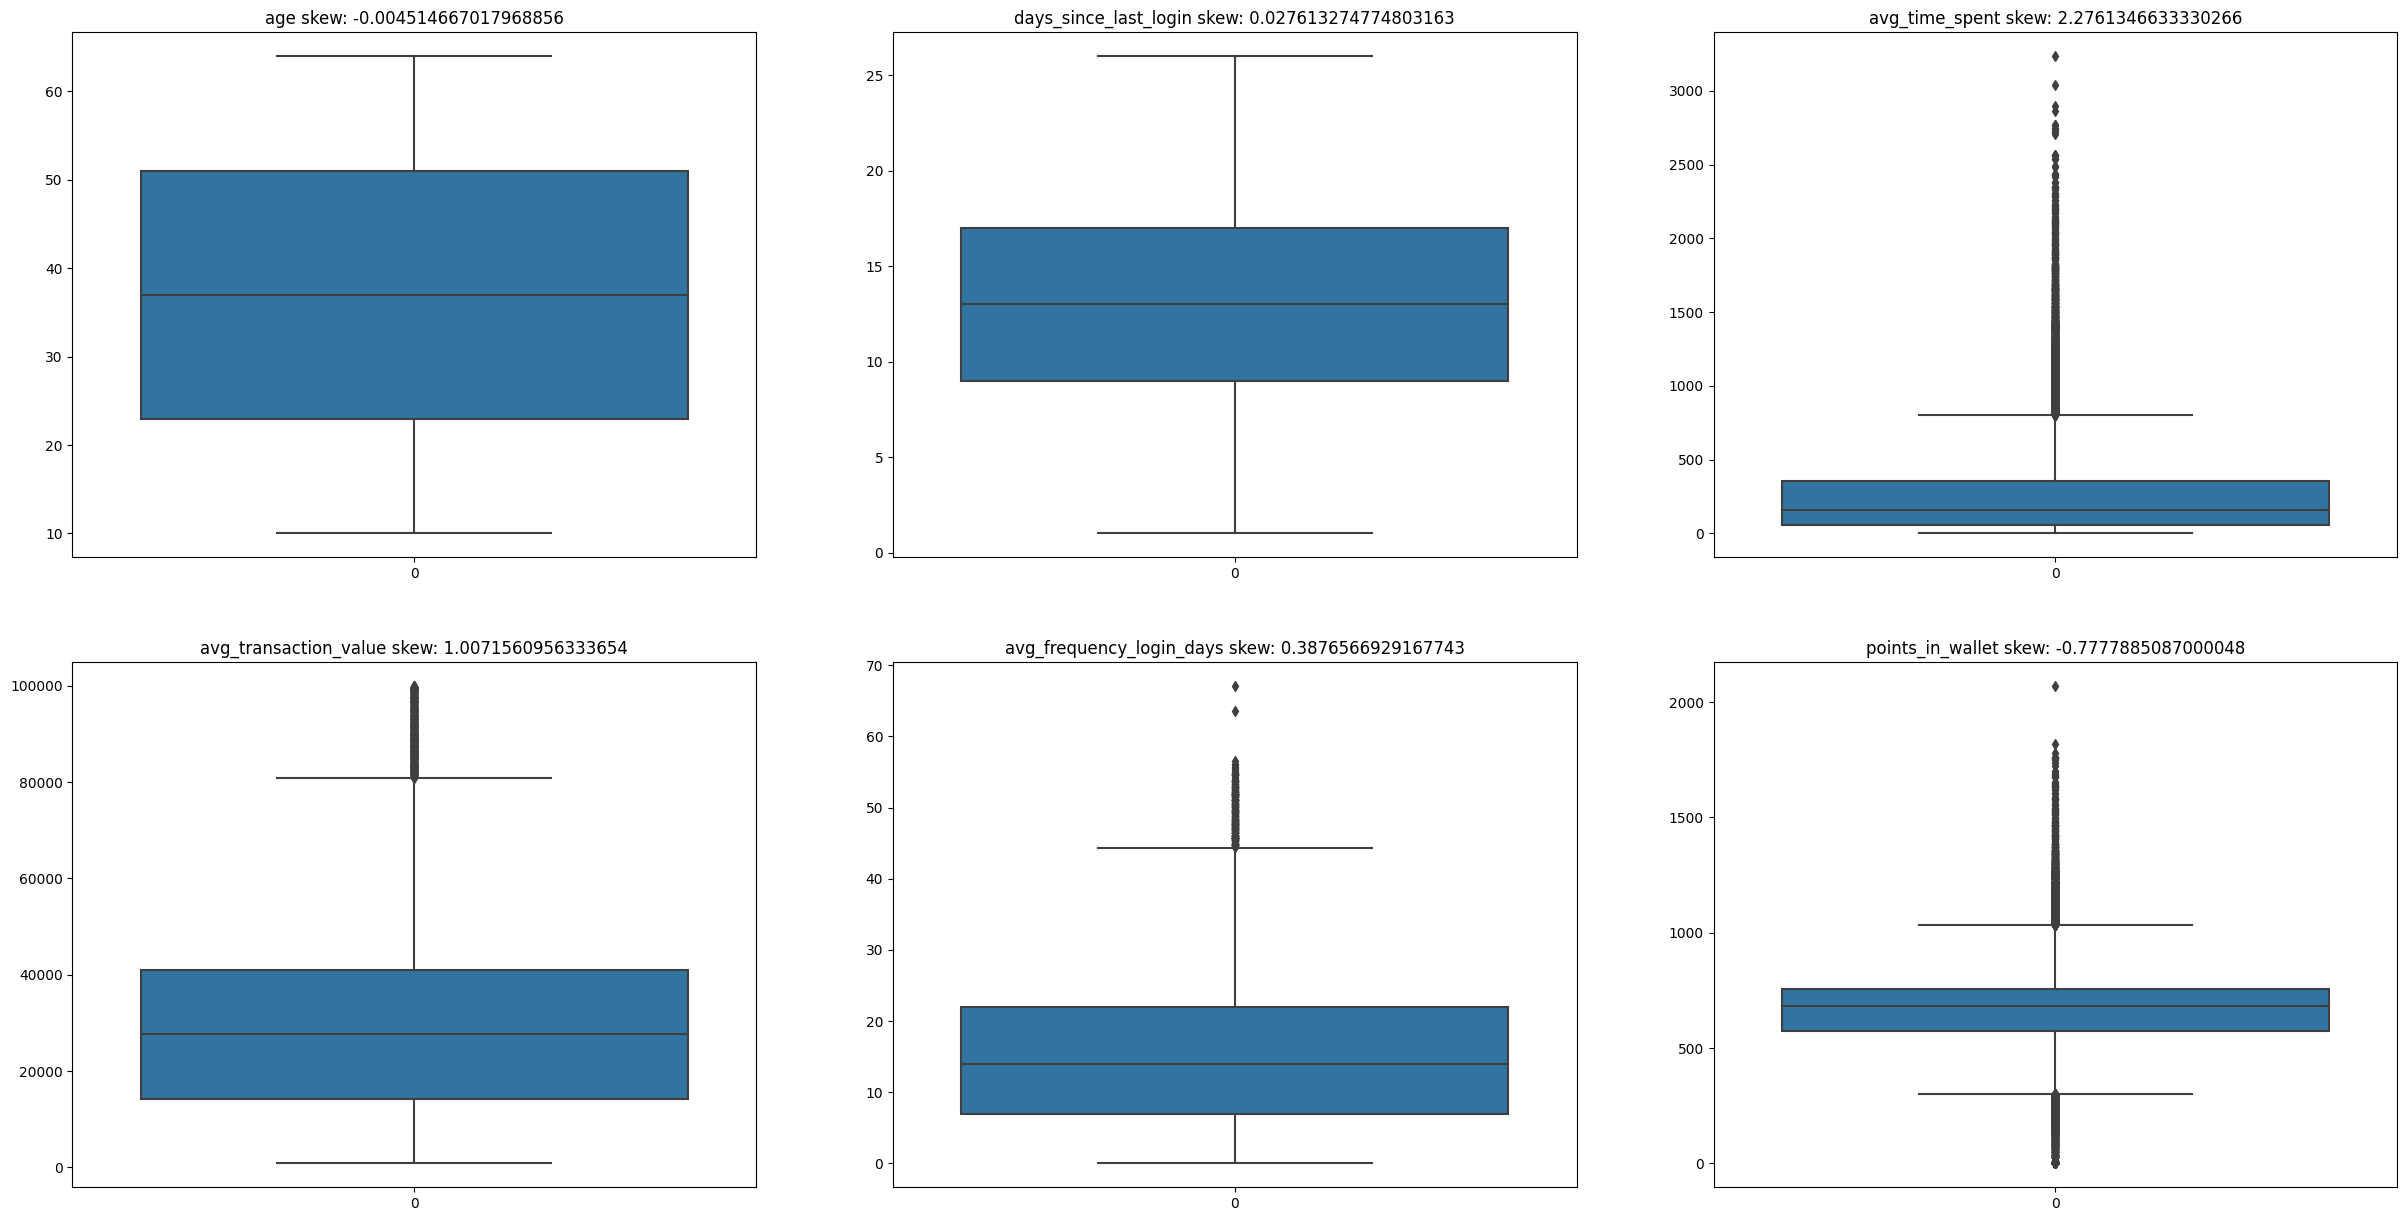

In [116]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=[30,15])
ax = ax.flatten()

for idx, col in enumerate(num_col1):
    sns.boxplot(df[col], ax=ax[idx])
    ax[idx].set_title(f'{num_col1[idx]} skew: {df[col].skew()}')
## visualize boxplot witht each skew

There are 3 skewed columns and 3 normal columns where we can separately use tukey's and gaussian ways to handle both of them. 

In [117]:
wins1 = Winsorizer(capping_method='iqr', fold=3, tail='both')
X_train_eda[['avg_time_spent','avg_transaction_value','points_in_wallet']] = wins1.fit_transform(X_train_eda[['avg_time_spent','avg_transaction_value','points_in_wallet']])
## handling outliers for skewed columns

In [118]:
wins2 = Winsorizer(capping_method='gaussian', fold=3, tail='both')
X_train_eda[['age','days_since_last_login','avg_frequency_login_days']] = wins1.fit_transform(X_train_eda[['age','days_since_last_login','avg_frequency_login_days']])
## handling outliers for normal distribution columns

In [119]:
X_train_eda.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,16503.000000,16503.000000,16503.000000,16503.000000,16503.000000,16503.000000,16503.000000
mean,36.975156,12.735745,271.765701,29123.517752,14.656394,626.229996,0.540205
std,15.925879,5.551833,300.231392,19595.913493,9.473480,260.006418,0.498396
min,10.000000,1.000000,0.000000,800.460000,0.000000,34.760000,0.000000
25%,23.000000,9.000000,59.785000,13736.770000,7.000000,576.425000,0.000000
50%,37.000000,13.000000,162.510000,27280.570000,14.000000,680.240000,1.000000
75%,51.000000,17.000000,357.005000,40830.410000,22.000000,756.980000,1.000000
max,64.000000,26.000000,1248.665000,99858.020000,67.000000,1298.645000,1.000000


We handled the skewed distribution with tukey's and normal distribution with gaussian method. And we can see that the mean and median from each columns are close to each other which indicates the distribution are considered normal.

In [120]:
mm =  MinMaxScaler()
X_train_eda[num_col1] = mm.fit_transform(X_train_eda[num_col1])
## scaling numeric columns

We use the min max scaller for the numeric columns because the data still contains some outliers on 'avg_time_spent' and the data has a small range of data.*

So numeric columns have been handled the outliers and scaled.

`*source: https://datascience.stackexchange.com/questions/43972/when-should-i-use-standardscaler-and-when-minmaxscaler#:~:text=StandardScaler%20is%20useful%20for%20the,in%20the%20RGB%20color%20range).`

--- Feature Engineerring on Categorical Columns ---

-- Ordinal Encoder --

In [121]:
membership_category	 = ['No Membership','Basic Membership','Silver Membership','Gold Membership','Premium Membership','Platinum Membership']
ord_feature1 = ['membership_category']
ord_membership_category = OrdinalEncoder(categories=[membership_category])

complaint_status = ['Not Applicable','Unsolved','Solved']
ord_feature2 = ['complaint_status']
ord_complaint_status = OrdinalEncoder(categories=[complaint_status])

feedback = ['Poor', 'No reason specified', 'Good']
ord_feature3 = ['feedback']
ord_feedback = OrdinalEncoder(categories=[feedback])

ord_feature4 = ['gender','joined_through_referral','used_special_discount','offer_application_preference','past_complaint']
ordinal = OrdinalEncoder()

The code above is used to determine the order of values that are important for columns that need to be ordinal encoded. For columns that have binary values, we can also use ordinal encoding instead of one hot encoder that creates many columns in the dataframe.

In [122]:
ord = ColumnTransformer(transformers= [
    ('ord1', ord_membership_category, ord_feature1),
    ('ord2', ord_complaint_status, ord_feature2),
    ('ord3', ord_feedback, ord_feature3),
    ('ord', ordinal, ord_feature4)
])
## using column transformer for ordinal process

In [123]:
X_train_eda[['membership_category','complaint_status','feedback','gender','joined_through_referral','used_special_discount','offer_application_preference','past_complaint']] = ord.fit_transform(X_train_eda[['membership_category','complaint_status','feedback','gender','joined_through_referral','used_special_discount','offer_application_preference','past_complaint']])
## fit transform the ordinal columns

X_train_eda[['membership_category','complaint_status','feedback','gender','joined_through_referral','used_special_discount','offer_application_preference','past_complaint']].columns = ['membership_category','complaint_status','feedback','gender','joined_through_referral','used_special_discount','offer_application_preference','past_complaint']
## making the same column's name as before

In [124]:
X_train_eda.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
31474,0.351852,0.0,Town,3.0,1.0,Gift Vouchers/Coupons,Smartphone,Wi-Fi,0.56,0.079981,0.521092,0.283582,0.000000,0.0,1.0,0.0,0.0,2.0,0
35521,0.018519,0.0,Other,3.0,0.0,Gift Vouchers/Coupons,Other,Wi-Fi,0.84,0.189386,0.408345,0.373134,0.495907,1.0,0.0,0.0,0.0,0.0,1
8919,0.425926,0.0,Town,0.0,0.0,Gift Vouchers/Coupons,Desktop,Wi-Fi,0.44,0.220836,0.344426,0.074627,0.480946,1.0,1.0,1.0,2.0,1.0,1
12959,0.148148,0.0,City,4.0,0.0,Without Offers,Desktop,Fiber_Optic,0.32,0.302635,0.446746,0.194030,0.599493,0.0,1.0,0.0,0.0,1.0,0
33211,0.388889,1.0,Town,0.0,0.0,Credit/Debit Card Offers,Smartphone,Fiber_Optic,0.92,0.053401,0.323227,0.238806,0.537525,0.0,1.0,0.0,0.0,0.0,1


As we can see that only several columns left that needed to be encoded with one hot encoder since its have no ordinal values

-- One Hot Encoder --

In [125]:
ohe = OneHotEncoder(sparse=False) ## caling OHE function 
cat_ohe = pd.DataFrame(ohe.fit_transform(X_train_eda[['region_category','preferred_offer_types','medium_of_operation','internet_option']])) ## fit transform plus making it a dataframe
cat_ohe.columns = ohe.get_feature_names_out(['region_category','preferred_offer_types','medium_of_operation','internet_option']) ## get the original columns name for the OHE column

In [126]:
cat_ohe.head()

,region_category_City,region_category_Other,region_category_Town,region_category_Village,preferred_offer_types_Credit/Debit Card Offers,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_Both,medium_of_operation_Desktop,medium_of_operation_Other,medium_of_operation_Smartphone,internet_option_Fiber_Optic,internet_option_Mobile_Data,internet_option_Wi-Fi
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


With the one hot encoding (OHE) technique, we add a number of columns equal to the number of unique categories in the original feature.  As a result, we can drop the original column after performing OHE.

In [127]:
X_train_eda.drop(columns=['region_category','preferred_offer_types','medium_of_operation','internet_option'],inplace=True)
## drop some columns

After the original columns been dropped, we can merge the ohe dataframe with the X_train_eda resulting all columns will all have the numeric feature.

In [128]:
review = pd.concat([X_train_eda.reset_index(drop=True), cat_ohe], axis=1)
## merge all the columns that have been encoded

In [129]:
review.head()

,age,gender,membership_category,joined_through_referral,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,...,preferred_offer_types_Credit/Debit Card Offers,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_Both,medium_of_operation_Desktop,medium_of_operation_Other,medium_of_operation_Smartphone,internet_option_Fiber_Optic,internet_option_Mobile_Data,internet_option_Wi-Fi
0,0.351852,0.0,3.0,1.0,0.56,0.079981,0.521092,0.283582,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.018519,0.0,3.0,0.0,0.84,0.189386,0.408345,0.373134,0.495907,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.425926,0.0,0.0,0.0,0.44,0.220836,0.344426,0.074627,0.480946,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.148148,0.0,4.0,0.0,0.32,0.302635,0.446746,0.194030,0.599493,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.388889,1.0,0.0,0.0,0.92,0.053401,0.323227,0.238806,0.537525,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


The resulting dataframe after applying feature encoding techniques such as ordinal encoding or one hot encoding will have columns with numerical values that can be easily used for feature selection methods. This makes it easier to analyze and extract relevant features for building machine learning models.

--- Feature Selection ---

In this feature selection I will use
- Mutual information regression: this method is useful for identifying features that have a strong statistical relationship with the target variable, by measuring the amount of mutual information shared between each feature and the target variable. This can be useful for identifying the most relevant features for a predictive model.
- Phik matrix: This method is useful for identifying non-linear associations between features, which may be missed by other feature selection methods that only consider linear relationships. It measures the dependency between two variables based on the information theory concept of phi coefficient, and can help identify features that have a strong association with each other.
- Recursive feature elimination: This method involves repeatedly training a model and removing the least important features until the desired number of features is reached. It is useful for identifying a small subset of features that are most important for building a predictive model, while minimizing the risk of overfitting.

*source:
- https://jmlr.csail.mit.edu/papers/volume3/guyon03a/guyon03a.pdf
- https://arxiv.org/pdf/1712.05358.pdf
- https://machinelearningmastery.com/rfe-feature-selection-in-python/#:~:text=Recursive%20Feature%20Elimination%2C%20or%20RFE,in%20predicting%20the%20target%20variable.




In [130]:
review.phik_matrix().nlargest(8,'churn_risk_score')['churn_risk_score']
## showing phix matrix score

interval columns not set, guessing: ['age', 'gender', 'membership_category', 'joined_through_referral', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback', 'churn_risk_score', 'region_category_City', 'region_category_Other', 'region_category_Town', 'region_category_Village', 'preferred_offer_types_Credit/Debit Card Offers', 'preferred_offer_types_Gift Vouchers/Coupons', 'preferred_offer_types_Without Offers', 'medium_of_operation_Both', 'medium_of_operation_Desktop', 'medium_of_operation_Other', 'medium_of_operation_Smartphone', 'internet_option_Fiber_Optic', 'internet_option_Mobile_Data', 'internet_option_Wi-Fi']


churn_risk_score                               1.000000
membership_category                            0.943709
points_in_wallet                               0.736890
avg_transaction_value                          0.408051
feedback                                       0.284987
avg_frequency_login_days                       0.186213
preferred_offer_types_Without Offers           0.062317
preferred_offer_types_Gift Vouchers/Coupons    0.055456
Name: churn_risk_score, dtype: float64

In [131]:
mutual_info =  mutual_info_classif(review,y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = review.columns
mutual_info.sort_values(ascending=False)
## showing mutual info score

churn_risk_score                                  0.692335
membership_category                               0.406613
points_in_wallet                                  0.393811
feedback                                          0.135302
avg_transaction_value                             0.067906
avg_frequency_login_days                          0.032666
region_category_Other                             0.006363
gender                                            0.005657
preferred_offer_types_Without Offers              0.004578
region_category_Town                              0.004490
internet_option_Fiber_Optic                       0.004424
medium_of_operation_Other                         0.004097
offer_application_preference                      0.003845
avg_time_spent                                    0.003430
past_complaint                                    0.002725
age                                               0.002560
joined_through_referral                           0.0022

In [132]:
lr = LogisticRegression(max_iter=300) 
rfe = RFE(estimator=lr, n_features_to_select=8, step=1) ## using logistic regression as estimator
rfe.fit(review, y_train)
rfe.transform(review)
result = pd.DataFrame(rfe.transform(review), columns=rfe.get_feature_names_out()) ## making the result in dataframe and call out the column names
result.head()

,membership_category,avg_transaction_value,avg_frequency_login_days,points_in_wallet,offer_application_preference,feedback,churn_risk_score,preferred_offer_types_Without Offers
0,3.0,0.521092,0.283582,0.000000,1.0,2.0,0.0,0.0
1,3.0,0.408345,0.373134,0.495907,0.0,0.0,1.0,0.0
2,0.0,0.344426,0.074627,0.480946,1.0,1.0,1.0,0.0
3,4.0,0.446746,0.194030,0.599493,1.0,1.0,0.0,1.0
4,0.0,0.323227,0.238806,0.537525,1.0,0.0,1.0,0.0


Based on phik matrix, mutual info classification and recursive elimination, so the feature that will be selected are:
- membership_category (categorical)
- points_in_wallet (numerical)
- avg_transaction_value (numerical)
- feedback (categorical)
- avg_frequency_login_days (numerical)

In [133]:
X = review[['membership_category', 'points_in_wallet', 'avg_transaction_value','feedback', 'avg_frequency_login_days']] 
vif_data = pd.DataFrame() 
vif_data['feature'] = X.columns 
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]  
(vif_data.sort_values(by='VIF', ascending=False))

,feature,VIF
1,points_in_wallet,4.075576
2,avg_transaction_value,3.153336
0,membership_category,3.019399
4,avg_frequency_login_days,2.561090
3,feedback,1.905638


From variance inflation factor we can see that there are no mutlicollinearity among the columns choosen which can improve the accuracy and interpretability of the model.

In [134]:
X_train_featsel = X_train[['membership_category','points_in_wallet','avg_transaction_value','feedback','avg_frequency_login_days']].reset_index(drop=True)
X_test_featsel = X_test[['membership_category','points_in_wallet','avg_transaction_value','feedback','avg_frequency_login_days']].reset_index(drop=True)
X_val_featsel = X_val[['membership_category','points_in_wallet','avg_transaction_value','feedback','avg_frequency_login_days']].reset_index(drop=True)
## creating X_train, X_test and X_val with feature selection columns

### Preprocess

In [135]:
num_pipeline1 = Pipeline([
    ('mv',KNNImputer(n_neighbors=5)),
    ('outlier',Winsorizer(capping_method='iqr', fold=3, tail='both')),
    ('scaling', MinMaxScaler())
])
## creating numeric pipeline with tukey's rule winsorizer

In [136]:
num_pipeline2 = Pipeline([
    ('mv',KNNImputer(n_neighbors=5)),
    ('outlier',Winsorizer(capping_method='gaussian', fold=3, tail='both')),
    ('scaling', MinMaxScaler())
])
## creating numeric pipeline with gaussian winsorizer

In [137]:
cat_pipeline1 = Pipeline([
    ('mv',SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(categories=[membership_category,feedback]))
])
## creating category pipeline

In [138]:
pipeline = ColumnTransformer([
    ('num1', num_pipeline1, ['avg_transaction_value','points_in_wallet']),
    ('num2', num_pipeline2, ['avg_frequency_login_days']),
    ('ord', cat_pipeline1, ['membership_category','feedback'])
])
## pipeline function that ready to fit and transform

In [139]:
X_train_featsel = pd.DataFrame(pipeline.fit_transform(X_train_featsel)) ## fit transform to X_train
X_test_featsel = pd.DataFrame(pipeline.transform(X_test_featsel)) ## transform to X_test
X_val_featsel= pd.DataFrame(pipeline.transform(X_val_featsel))  ## transform to X_validation

Now we have all the X train, test and validation been transformed with the the help of pipeline and ready to be modeled.

### Model Architecture

So in this part we will cover sequential and functional model. We will see the comparison before and after tunning, and choose ethe best one to predict the data.

--- Sequential Model --- 

In [148]:
# Train Program
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_featsel, y_train))

## Shuffle train dataset.
train_dataset = train_dataset.shuffle(buffer_size=29).batch(64)

## Test dataset.
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_featsel, y_test))
test_dataset = test_dataset.batch(64)

## Validation dataset
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_featsel, y_val))
val_dataset = val_dataset.batch(64)

In [150]:
# Define Model's Architecture
def uncompiled_model_seq():
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(shape=(X_train_featsel.shape[1:])))
    model.add(tf.keras.layers.Dense(58, activation="relu"))
    model.add(tf.keras.layers.Dense(29, activation="relu"))
    model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
    return model

# Define Training Configuration (Optimizer, Loss, Metrics)
def compiled_model_seq():
    model = uncompiled_model_seq()
    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [199]:
model_seq = compiled_model_seq()

In [200]:
model_seq.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_128 (Dense)           (None, 58)                348       
                                                                 
 dense_129 (Dense)           (None, 29)                1711      
                                                                 
 dense_130 (Dense)           (None, 1)                 30        
                                                                 
Total params: 2,089
Trainable params: 2,089
Non-trainable params: 0
_________________________________________________________________


In [202]:
history = model_seq.fit(train_dataset,  epochs=33, validation_data=val_dataset)

Epoch 1/33
258/258 [==============================] - 2s 4ms/step - loss: 0.3911 - accuracy: 0.8133 - val_loss: 0.3194 - val_accuracy: 0.8387
Epoch 2/33
258/258 [==============================] - 1s 2ms/step - loss: 0.2995 - accuracy: 0.8487 - val_loss: 0.3001 - val_accuracy: 0.8411
Epoch 3/33
258/258 [==============================] - 1s 2ms/step - loss: 0.2880 - accuracy: 0.8484 - val_loss: 0.2905 - val_accuracy: 0.8428
Epoch 4/33
258/258 [==============================] - 1s 2ms/step - loss: 0.2817 - accuracy: 0.8506 - val_loss: 0.2854 - val_accuracy: 0.8437
Epoch 5/33
258/258 [==============================] - 1s 2ms/step - loss: 0.2772 - accuracy: 0.8512 - val_loss: 0.2808 - val_accuracy: 0.8436
Epoch 6/33
258/258 [==============================] - 1s 2ms/step - loss: 0.2737 - accuracy: 0.8519 - val_loss: 0.2771 - val_accuracy: 0.8441
Epoch 7/33
258/258 [==============================] - 0s 2ms/step - loss: 0.2709 - accuracy: 0.8532 - val_loss: 0.2741 - val_accuracy: 0.8430
Epoch 

Text(0.5, 0, 'Epoch')

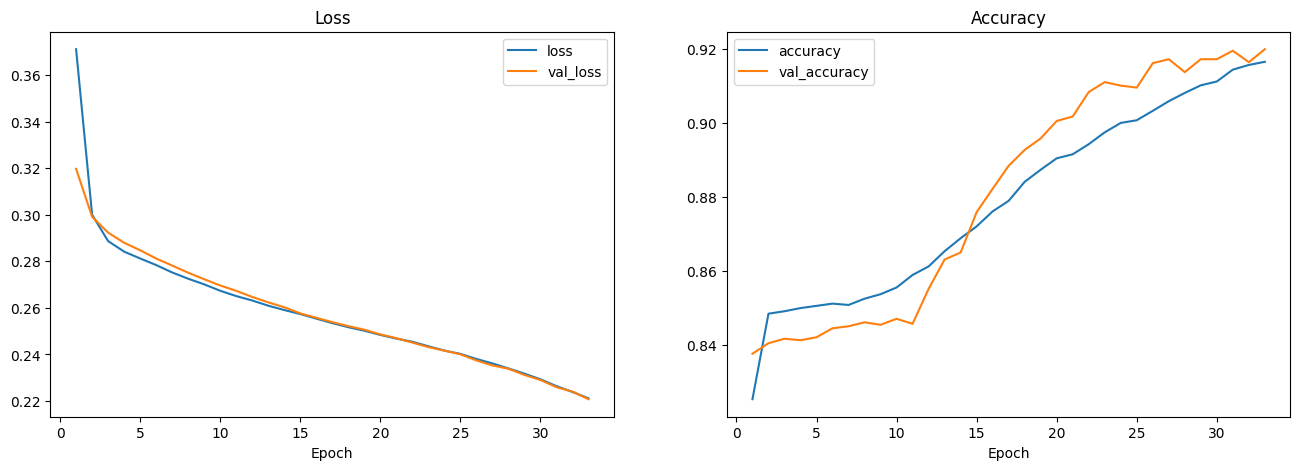

In [188]:
epoch=33

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,0.01)

ax[1].plot(range(1,epoch+1),history.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0.5,1.5)

In [203]:
model_seq.evaluate(val_dataset)

116/116 [==============================] - 0s 1ms/step - loss: 0.2409 - accuracy: 0.9208


[0.240928515791893, 0.9208361506462097]

From sequential model that I made above, I put 2 hidden layers with 2000 more parameters.
From the graph above we can see that from gradient loss and the accuracy score, the model is good fit. The validation data has the a good result after being trained more than 15 times.

--- Functional Model ---

In [277]:
# Define Model's Architecture
def uncompiled_model_fun():
    inputs = tf.keras.Input(shape=(X_train_featsel.shape[1:]))
    layer1 = tf.keras.layers.Dense(30, activation="relu")(inputs)
    layer2 = tf.keras.layers.Dense(30, activation="relu")(inputs)
    layer11 = tf.keras.layers.Dense(15, activation="relu")(layer1)
    layer22 = tf.keras.layers.Dense(15, activation='relu')(layer2)
    concat = tf.keras.layers.concatenate([layer11, layer22])
    outputs = tf.keras.layers.Dense(1, activation="sigmoid")(concat)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

# Define Training Configuration (Optimizer, Loss, Metrics)
def compiled_model_fun():
    model = uncompiled_model_fun()
    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [278]:
model_fun = compiled_model_fun()

In [279]:
model_fun.summary()


Model: "model_25"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_52 (InputLayer)          [(None, 5)]          0           []                               
                                                                                                  
 dense_183 (Dense)              (None, 30)           180         ['input_52[0][0]']               
                                                                                                  
 dense_184 (Dense)              (None, 30)           180         ['input_52[0][0]']               
                                                                                                  
 dense_185 (Dense)              (None, 15)           465         ['dense_183[0][0]']              
                                                                                           

In [280]:
history = model_fun.fit(train_dataset,  epochs=33, validation_data=val_dataset)

Epoch 1/33
258/258 [==============================] - 2s 3ms/step - loss: 0.3991 - accuracy: 0.8194 - val_loss: 0.3204 - val_accuracy: 0.8387
Epoch 2/33
258/258 [==============================] - 0s 2ms/step - loss: 0.3012 - accuracy: 0.8488 - val_loss: 0.3010 - val_accuracy: 0.8419
Epoch 3/33
258/258 [==============================] - 1s 2ms/step - loss: 0.2889 - accuracy: 0.8487 - val_loss: 0.2916 - val_accuracy: 0.8421
Epoch 4/33
258/258 [==============================] - 1s 2ms/step - loss: 0.2824 - accuracy: 0.8495 - val_loss: 0.2864 - val_accuracy: 0.8440
Epoch 5/33
258/258 [==============================] - 1s 2ms/step - loss: 0.2784 - accuracy: 0.8497 - val_loss: 0.2829 - val_accuracy: 0.8429
Epoch 6/33
258/258 [==============================] - 1s 2ms/step - loss: 0.2758 - accuracy: 0.8512 - val_loss: 0.2807 - val_accuracy: 0.8415
Epoch 7/33
258/258 [==============================] - 1s 2ms/step - loss: 0.2731 - accuracy: 0.8511 - val_loss: 0.2778 - val_accuracy: 0.8425
Epoch 

Text(0.5, 0, 'Epoch')

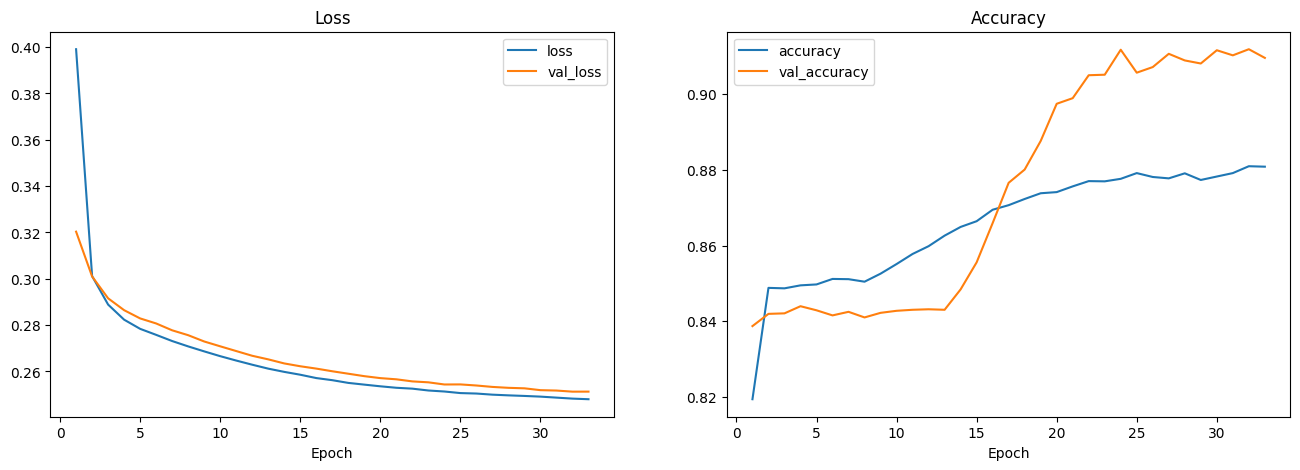

In [281]:
epoch=33

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),history.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

In [282]:
model_fun.evaluate(val_dataset)

116/116 [==============================] - 0s 1ms/step - loss: 0.2513 - accuracy: 0.9096


[0.25129327178001404, 0.9096426367759705]

From functional model that I made above, I split 2 hidden layers with same neuron on each hidden layer which resulted in 1300ish parameters.
From the graph above we can see that from gradient loss and the accuracy score, the model is good fit. The validation data has the a good result after being trained more than 15 times, same like the sequential one but resulting in better accuracy score.

Now after seeing both sequential and functional 

--- Sequential With Tuning Model ---

In [177]:
# Define Model's Architecture
def uncompiled_model_seq_tun():
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(shape=(X_train_featsel.shape[1:])))
    model.add(tf.keras.layers.Dense(58, activation="relu", kernel_initializer='he_uniform'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dense(29, activation="relu", kernel_initializer='he_uniform'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
    return model

# Define Training Configuration (Optimizer, Loss, Metrics)
def compiled_model_seq_tun():
    model = uncompiled_model_seq_tun()
    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["accuracy"]
        )
    return model

In [210]:
model_seq_tun = compiled_model_seq_tun()

In [211]:
model_seq_tun.summary()


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_136 (Dense)           (None, 58)                348       
                                                                 
 batch_normalization_12 (Bat  (None, 58)               232       
 chNormalization)                                                
                                                                 
 dense_137 (Dense)           (None, 29)                1711      
                                                                 
 batch_normalization_13 (Bat  (None, 29)               116       
 chNormalization)                                                
                                                                 
 dense_138 (Dense)           (None, 1)                 30        
                                                                 
Total params: 2,437
Trainable params: 2,263
Non-train

In [212]:
history = model_seq_tun.fit(train_dataset,  epochs=33, validation_data=val_dataset, callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])

Epoch 1/33
258/258 [==============================] - 2s 3ms/step - loss: 0.3198 - accuracy: 0.8420 - val_loss: 0.2893 - val_accuracy: 0.8552
Epoch 2/33
258/258 [==============================] - 1s 2ms/step - loss: 0.2712 - accuracy: 0.8720 - val_loss: 0.2595 - val_accuracy: 0.8806
Epoch 3/33
258/258 [==============================] - 1s 2ms/step - loss: 0.2546 - accuracy: 0.8916 - val_loss: 0.2441 - val_accuracy: 0.9099
Epoch 4/33
258/258 [==============================] - 1s 2ms/step - loss: 0.2428 - accuracy: 0.9008 - val_loss: 0.2345 - val_accuracy: 0.9045
Epoch 5/33
258/258 [==============================] - 1s 3ms/step - loss: 0.2294 - accuracy: 0.9093 - val_loss: 0.2128 - val_accuracy: 0.9219
Epoch 6/33
258/258 [==============================] - 1s 3ms/step - loss: 0.2144 - accuracy: 0.9163 - val_loss: 0.1998 - val_accuracy: 0.9215
Epoch 7/33
258/258 [==============================] - 1s 2ms/step - loss: 0.2034 - accuracy: 0.9211 - val_loss: 0.1913 - val_accuracy: 0.9207
Epoch 

Text(0.5, 0, 'Epoch')

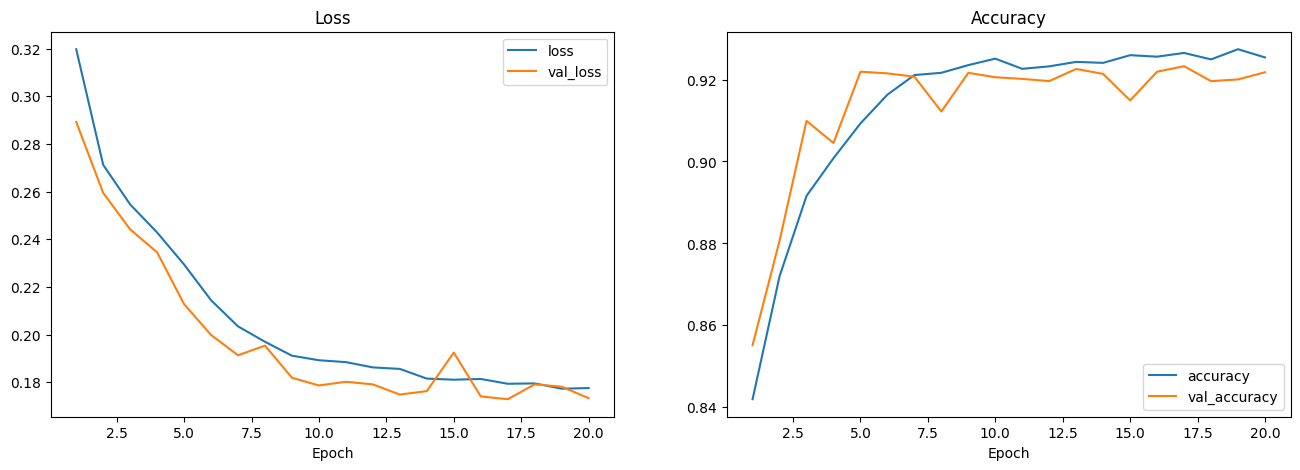

In [213]:
epoch=20

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),history.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

As we can see with the tunning the score of the accuracy is better than without the tunning. The tunning on this seqential tunning models are adding kernel initializer, batch normalisation, and call backs. 

In [214]:
model_seq_tun.evaluate(val_dataset)

116/116 [==============================] - 0s 1ms/step - loss: 0.1733 - accuracy: 0.9218


[0.17328260838985443, 0.9217801690101624]

--- Model Functional With Tunning ---

In [247]:
# Define Model's Architecture
def uncompiled_model_fun_tun():
    inputs = tf.keras.Input(shape=(X_train_featsel.shape[1:]))
    layer1 = tf.keras.layers.Dense(50, activation="relu")(inputs)
    layerA = tf.keras.layers.BatchNormalization()(layer1)
    layer2 = tf.keras.layers.Dense(50, activation="relu")(inputs)
    layerB = tf.keras.layers.BatchNormalization()(layer2)
    layer11 = tf.keras.layers.Dense(30, activation="relu")(layer1)
    layerAA = tf.keras.layers.BatchNormalization()(layer11)
    layer22 = tf.keras.layers.Dense(30, activation='relu')(layer2)
    layerBB = tf.keras.layers.BatchNormalization()(layer22)
    concat = tf.keras.layers.concatenate([layer11, layer22])
    outputs = tf.keras.layers.Dense(1, activation="sigmoid")(concat)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

# Define Training Configuration (Optimizer, Loss, Metrics)
def compiled_model_fun_tun():
    model = uncompiled_model_fun_tun()
    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [248]:
model_fun_tun = compiled_model_fun_tun()

In [249]:
model_fun_tun.summary()

Model: "model_23"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_50 (InputLayer)          [(None, 5)]          0           []                               
                                                                                                  
 dense_173 (Dense)              (None, 50)           300         ['input_50[0][0]']               
                                                                                                  
 dense_174 (Dense)              (None, 50)           300         ['input_50[0][0]']               
                                                                                                  
 dense_175 (Dense)              (None, 30)           1530        ['dense_173[0][0]']              
                                                                                           

In [250]:
history = model_fun_tun.fit(train_dataset,  epochs=33, validation_data=val_dataset, callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])

Epoch 1/33
258/258 [==============================] - 2s 2ms/step - loss: 0.3570 - accuracy: 0.8288 - val_loss: 0.3115 - val_accuracy: 0.8402
Epoch 2/33
258/258 [==============================] - 1s 2ms/step - loss: 0.2957 - accuracy: 0.8488 - val_loss: 0.2947 - val_accuracy: 0.8413
Epoch 3/33
258/258 [==============================] - 1s 2ms/step - loss: 0.2844 - accuracy: 0.8499 - val_loss: 0.2851 - val_accuracy: 0.8417
Epoch 4/33
258/258 [==============================] - 1s 2ms/step - loss: 0.2767 - accuracy: 0.8511 - val_loss: 0.2775 - val_accuracy: 0.8453
Epoch 5/33
258/258 [==============================] - 1s 2ms/step - loss: 0.2709 - accuracy: 0.8534 - val_loss: 0.2721 - val_accuracy: 0.8457
Epoch 6/33
258/258 [==============================] - 1s 2ms/step - loss: 0.2664 - accuracy: 0.8592 - val_loss: 0.2673 - val_accuracy: 0.8491
Epoch 7/33
258/258 [==============================] - 1s 2ms/step - loss: 0.2616 - accuracy: 0.8657 - val_loss: 0.2617 - val_accuracy: 0.8638
Epoch 

Text(0.5, 0, 'Epoch')

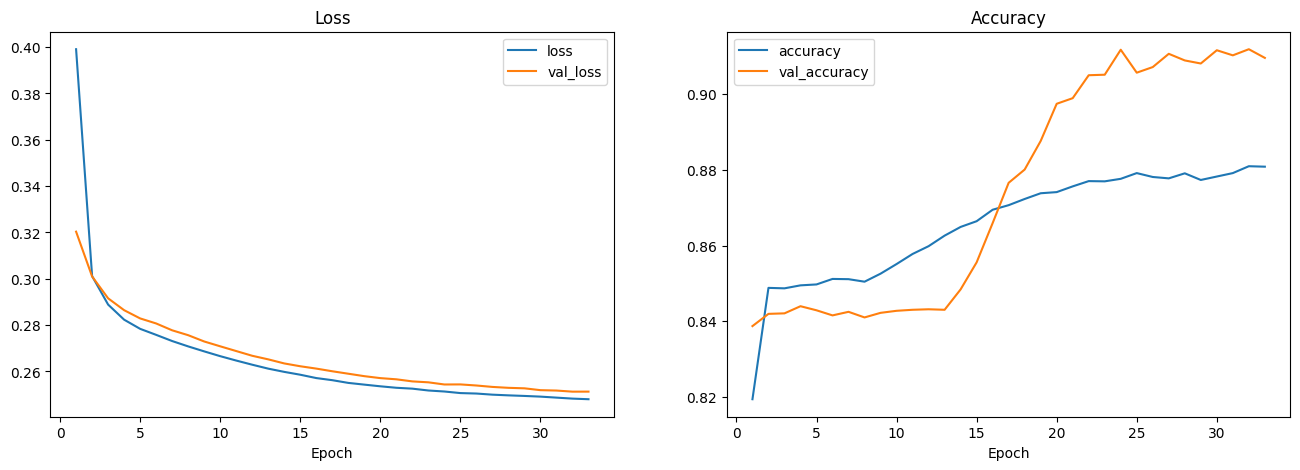

In [284]:
epoch=33

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),history.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

From the visualization above we can see that the validation score is better than the one without the tunning. The difference from without the tunning are adding more neurons to each of hidden layer, batch normalization and callbacks. But the callbacks is not activated in this case since the each eppoch there's an increase.

In [251]:
model_fun_tun.evaluate(val_dataset)

116/116 [==============================] - 0s 1ms/step - loss: 0.2156 - accuracy: 0.9222


[0.21558843553066254, 0.9221847653388977]

As we can see both of sequential and functional with parameter tunning are having better accuary score. And if we compare the sequential tunning with functional tunning, the better model is the functional tunning based on the accuracy score. In that case we will use the model to predict the data.

### Model Evaluation

In [258]:
model_fun_tun.fit(X_train_featsel, y_train) ## fit to X_train

516/516 [==============================] - 2s 2ms/step - loss: 0.2152 - accuracy: 0.9160


In [269]:
model_test = model_fun_tun.predict(X_test_featsel) ## predict to test
model_test = tf.where(model_test >= 0.5, 1,0) ## make values above 0.5 become 1

336/336 [==============================] - 0s 1ms/step


In [270]:
print(classification_report(model_test, y_test))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      5039
           1       0.92      0.93      0.93      5707

    accuracy                           0.92     10746
   macro avg       0.92      0.92      0.92     10746
weighted avg       0.92      0.92      0.92     10746



F1 score
0.926511466296039


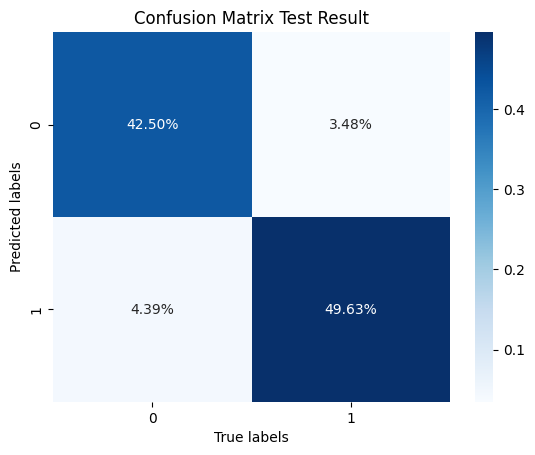

In [275]:
cf_matrix=confusion_matrix(y_test,model_test) ## confusion matrix after tunning
ax= plt.subplot()
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues', ax=ax);  
ax.set_ylabel('Predicted labels')
ax.set_xlabel('True labels') 
ax.set_title('Confusion Matrix Test Result')
print('F1 score')
print(f1_score(y_test, model_test))

Based on the classification report, it appears that the model has a high accuracy in predicting both class 0 and class 1, indicating that it is effective in predicting individuals who are likely to churn and those who are likely to stay. The confusion matrix further supports this, as it shows a low number of false negatives and false positives. This means that the model can help the business identify which customers require more attention and which promotions may be most effective in retaining them

### Model Saving

In [276]:
model_fun_tun.save('model.h5')

In [286]:
with open('pipeline.pkl','wb') as file_1:
  joblib.dump(pipeline, file_1)


### Conclusion
- After performing feature selection using mutual info classification, phik matrix, and recursive feature elimination, the best features for predicting customer churn are membership_category, points_in_wallet, avg_transaction_value, feedback, and avg_frequency_login_days.
- Both sequential and functional models are good fits for the data.
- Based on the validation results, both models have better accuracy scores after being trained more than 15 times, but the functional model performs slightly better after hyperparameter tuning.
- The model is good at classifying both class 0 and class 1, as evidenced by the high accuracy score.
- The model also has a low error rate for false negative and false positive predictions.
- From a business standpoint, the model can be used to identify customers who require more attention and determine which promotions may be most effective in retaining them.
- To further improve the model, different feature selection techniques and modifications to the model architecture can be explored to find better score

### Model Deployment
https://huggingface.co/spaces/andreetanjung/Milestone1-phase2